# Проверочный проект по линейной регрессии

Цель этого проекта - создать модель линейной регрессии, обучить её на данных с поиском оптимальных значений параметров по сетке, и затем оценить модель на тестовом наборе данных.

---
---
---
## Выполните задания, написанные жирным шрифтом

**ЗАДАНИЕ: Выполните ячейки ниже для импорта библиотек и загрузки данных. Возможно в будущем Вам понадобятся дополнительные команды import от scikit-learn.**

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Данные

In [3]:
df = pd.read_csv("AMES_Final_DF.csv")

In [4]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


**ЗАДАНИЕ: Анализ данных и визуализация данных.**

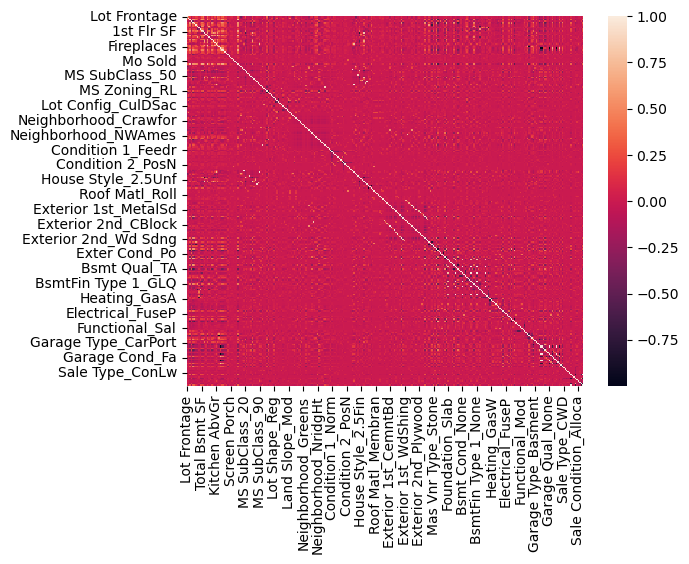

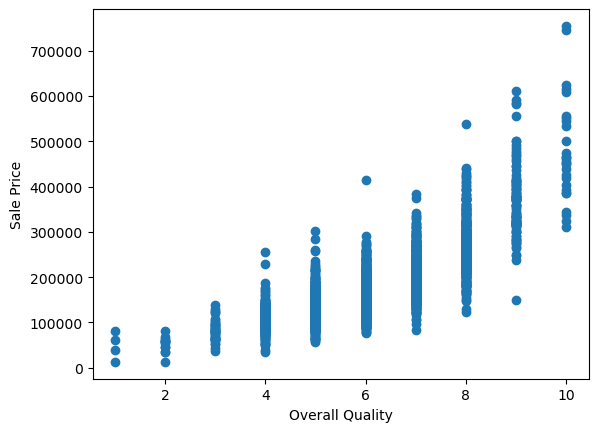

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

plt.scatter(df['Overall Qual'], df['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

**ЗАДАНИЕ: Мы будем пытаться спрогнозировать значение колонки SalePrice. Разделите данные на две части - признаки X и целевая переменная y.**

In [35]:
X = df.drop('SalePrice', axis=1) 
y = df['SalePrice'] 

**ЗАДАНИЕ: С помощью scikit-learn разделите и X, и y на обучающий и тестовый наборы данных. Поскольку далее мы будем использовать поиск по сетке, то выделите под тестовые данные 10% от всех данных. **

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**ЗАДАНИЕ: Признаки в этом наборе данных имеют различный масштаб и различные единицы измерения. Для оптимальной работы регрессии, выполните масштабирование признаков X. Обратите внимание на то, какие данные подавать на вход для .fit(), а какие данные на вход для .transform().**

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

# Масштабируем данные
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**ЗАДАНИЕ: Мы будем использовать модель "Elastic Net". Создайте экземпляр модели ElasticNet в scikit-learn, используя параметры по умолчанию.**

In [39]:
from sklearn.linear_model import ElasticNet

# Создание экземпляра модели ElasticNet с параметрами по умолчанию
model = ElasticNet()

**ЗАДАНИЕ: Модель Elastic Net работает с двумя основными параметрами - alpha и L1_ratio. Создайте словарь с набором различных значений этих параметров, для поиска по сетке. Вы можете выбрать различные значения параметров, но имейте ввиду, что Ваши результаты могут не совпасть с результатами в блокноте с решениями.**

In [41]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

**ЗАДАНИЕ: С помощью scikit-learn создайте объект GridSearchCV и запустите поиск по сетке для нахождения наилучших параметров модели, используя обучающие данные (предварительно смасштабированные). [Для некоторых комбинаций параметров Вы можете получить предупреждения (warnings).](https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge)**

In [42]:
# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Обучение GridSearchCV на обучающих данных
grid_search.fit(X_train_scaled, y_train)

C:\Users\Drama\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+11, tolerance: 1.328e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Drama\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+11, tolerance: 1.305e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Drama\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+11, toleranc

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]})

**ЗАДАНИЕ: Отобразите наилучшую комбинацию параметров для Вашей модели.**

In [43]:
print(grid_search.best_params_)

{'alpha': 0.1, 'l1_ratio': 0.7}


**ЗАДАНИЕ: Оцените работу модели на тестовом наборе данных (предварительно смасштабированном) в 10%, которые модель ещё не видела. В блокноте с решениями мы получили MAE = $\$$14149 и RMSE = $\$$20532**

In [45]:
# 1. Получение предсказаний модели для тестовых данных
y_pred = grid_search.predict(X_test_scaled)

# 2. Вычисление метрик качества модели
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {int(mae)}")
print(f"RMSE: {int(rmse)}")

MAE: 13918
RMSE: 21979


14149.055026374837

20532.890234901013